<a href="https://colab.research.google.com/github/HatemMoushir/CAPTCHA/blob/main/Shark%20identification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

path = "/content/drive/MyDrive/Shark_project"
files = os.listdir(path)
print(files)

['shark_fins_raw', 'sharks_raw.zip']


In [ ]:
!pip install -q imagehash Pillow pytesseract

import os
from PIL import Image, UnidentifiedImageError
import imagehash
import pytesseract
from collections import defaultdict
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/Shark_project"
min_size = (100, 100)
hash_dict = defaultdict(list)
duplicates = defaultdict(list)
bad_images = []
small_images = []
images_with_text = []

def display_images(image_paths, title):
    print(f"\n📸 {title} - عدد الصور: {len(image_paths)}\n")
    for path in image_paths[:10]:
        try:
            img = Image.open(path).convert("RGB")
            plt.imshow(img)
            plt.title(os.path.basename(path))
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"❌ خطأ أثناء العرض: {path}", e)

def has_text(img):
    text = pytesseract.image_to_string(img)
    return bool(text.strip())

for root, dirs, files in os.walk(base_path):
    for img_name in files:
        img_path = os.path.join(root, img_name)
        if not os.path.isfile(img_path):
            continue

        try:
            img = Image.open(img_path)
            img.verify()
            img = Image.open(img_path).convert("RGB")

            if img.size[0] < min_size[0] or img.size[1] < min_size[1]:
                small_images.append(img_path)

            hash_val = imagehash.phash(img)
            hash_dict[str(hash_val)].append(img_path)

            if has_text(img):
                images_with_text.append(img_path)

        except (UnidentifiedImageError, OSError) as e:
            bad_images.append(img_path)

for h, paths in hash_dict.items():
    if len(paths) > 1:
        duplicates[h] = paths

if small_images:
    display_images(small_images, "صور صغيرة الحجم")

if images_with_text:
    display_images(images_with_text, "صور تحتوي على كتابة / علامة مائية")

if duplicates:
    print(f"\n🔁 مجموعات صور مكررة بصريًا: {len(duplicates)}\n")
    for i, (h, paths) in enumerate(duplicates.items()):
        display_images(paths, f"صور مكررة - مجموعة {i+1}")

if bad_images:
    display_images(bad_images, "صور تالفة")

In [ ]:

# تثبيت المكتبات المطلوبة
!pip install -q imagehash Pillow

import os
from PIL import Image, UnidentifiedImageError
import imagehash
from collections import defaultdict
import matplotlib.pyplot as plt

# مسار المشروع في Google Drive
#base_path = "/content/drive/MyDrive/Shark_project"
base_path = "/content/Shark_project"

# إعدادات عامة
min_size = (100, 100)
hash_dict = defaultdict(list)
duplicates = defaultdict(list)
bad_images = []
small_images = []

# دالة عرض الصور
def display_images(image_paths, title):
    print(f"\n📸 {title} - عدد الصور: {len(image_paths)}\n")
    for i, path in enumerate(image_paths[:10]):  # نعرض فقط أول 10 صور
        try:
            img = Image.open(path).convert("RGB")
            plt.imshow(img)
            plt.title(f"{os.path.basename(path)}")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"❌ خطأ أثناء العرض: {path}", e)

# -------------------------------
# فحص شامل لكل الصور بشكل Recursive
# -------------------------------
for root, dirs, files in os.walk(base_path):
    for img_name in files:
        img_path = os.path.join(root, img_name)

        if not os.path.isfile(img_path):
            continue

        try:
            img = Image.open(img_path)
            img.verify()  # فحص إذا كانت تالفة
            img = Image.open(img_path).convert("RGB")  # إعادة الفتح لتحليلها

            # فحص الحجم
            if img.size[0] < min_size[0] or img.size[1] < min_size[1]:
                small_images.append(img_path)

            # حساب hash
            hash_val = imagehash.phash(img)
            hash_dict[str(hash_val)].append(img_path)

        except (UnidentifiedImageError, OSError) as e:
            bad_images.append(img_path)

# -------------------------------
# معالجة الصور المكررة بناءً على phash
# -------------------------------
for h, paths in hash_dict.items():
    if len(paths) > 1:
        duplicates[h] = paths

# -------------------------------
# عرض النتائج
# -------------------------------

# الصور صغيرة الحجم
if small_images:
    display_images(small_images, "صور صغيرة الحجم (< 100x100)")

# الصور المكررة بصريًا
if duplicates:
    print(f"\n🔁 مجموعات صور مكررة بصريًا: {len(duplicates)}\n")
    for i, (h, paths) in enumerate(duplicates.items()):
        print(f"\n🧩 المجموعة {i+1} - Hash: {h} - عدد الصور: {len(paths)}")
        display_images(paths, f"صور مكررة - مجموعة {i+1}")

# الصور التالفة
if bad_images:
    display_images(bad_images, "صور تالفة")

In [ ]:
# -------------------------------
# حذف الصور المكررة (نترك واحدة فقط)
# -------------------------------

deleted_count = 0
for h, paths in duplicates.items():
    # نترك أول صورة، ونحذف الباقي
    for duplicate_path in paths[1:]:
        try:
            os.remove(duplicate_path)
            deleted_count += 1
            print(f"🗑️ حذف: {duplicate_path}")
        except Exception as e:
            print(f"❌ فشل في الحذف: {duplicate_path} - {e}")

print(f"\n✅ تم حذف {deleted_count} صورة مكررة وترك نسخة واحدة فقط من كل مجموعة.")

In [ ]:
from collections import Counter

class_counts = Counter()

for root, dirs, files in os.walk("/content/Shark_project"):
    for d in dirs:
        folder = os.path.join(root, d)
        count = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[d] = count

print("📊 توزيع الصور على الفئات:")
for class_name, count in class_counts.items():
    print(f"{class_name:25s}: {count} صورة")

📊 توزيع الصور على الفئات:
shark_fins_raw           : 0 صورة
Hammerhead_Shark         : 160 صورة
Tiger_shark              : 15 صورة
Whale_Shark              : 30 صورة
Bull shark               : 13 صورة
Whitetip_Shark           : 140 صورة
Great_White_Shark        : 14 صورة
Blacktip_Shark           : 102 صورة
Mako shark               : 19 صورة


In [ ]:

import os

# المسار الجديد بناءً على كلامك
base_dir = "/content/Shark_project/shark_fins_raw"

# خريطة الأسماء التي نريد توحيدها
rename_map = {
    "Bull shark": "Bull_Shark",
    "Mako shark": "Mako_Shark",
    "Tiger_shark": "Tiger_Shark",
    "Great_White_Shark": "Great_White_Shark",
    "Blacktip_Shark": "Blacktip_Shark",
    "Hammerhead_Shark": "Hammerhead_Shark",
    "Whale_Shark": "Whale_Shark",
    "Whitetip_Shark": "Whitetip_Shark",
}

# تنفيذ إعادة التسمية
for old_name, new_name in rename_map.items():
    old_path = os.path.join(base_dir, old_name)
    new_path = os.path.join(base_dir, new_name)
    if os.path.exists(old_path):
        os.rename(old_path, new_path)
        print(f"✅ Renamed: {old_name} → {new_name}")
    else:
        print(f"⚠️ Skipped (not found): {old_name}")

✅ Renamed: Bull shark → Bull_Shark
✅ Renamed: Mako shark → Mako_Shark
✅ Renamed: Tiger_shark → Tiger_Shark
✅ Renamed: Great_White_Shark → Great_White_Shark
✅ Renamed: Blacktip_Shark → Blacktip_Shark
✅ Renamed: Hammerhead_Shark → Hammerhead_Shark
✅ Renamed: Whale_Shark → Whale_Shark
✅ Renamed: Whitetip_Shark → Whitetip_Shark



🦈 Blacktip_Shark — Showing 3 image(s):


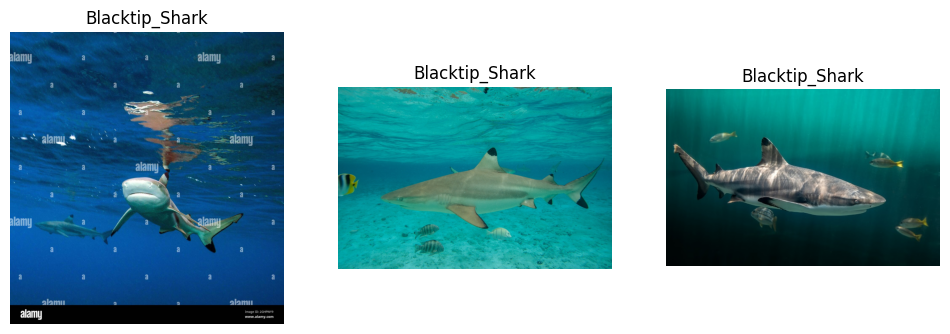


🦈 Bull_Shark — Showing 3 image(s):


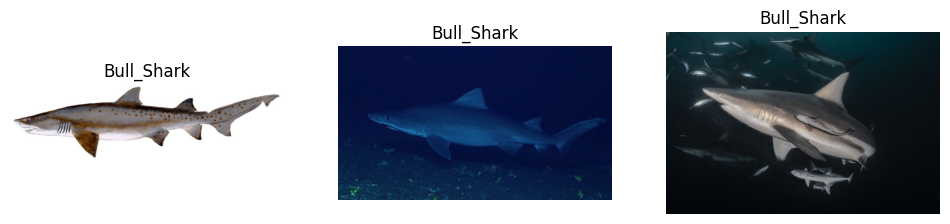


🦈 Great_White_Shark — Showing 3 image(s):


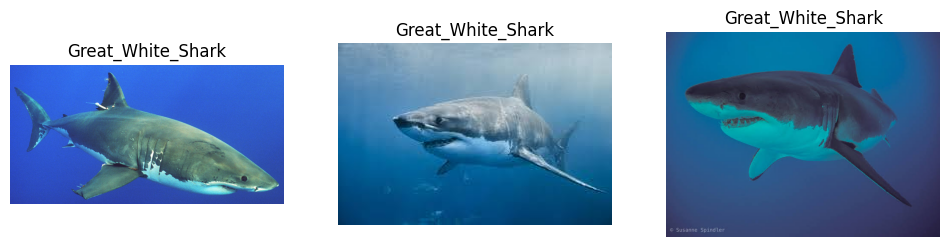


🦈 Hammerhead_Shark — Showing 3 image(s):


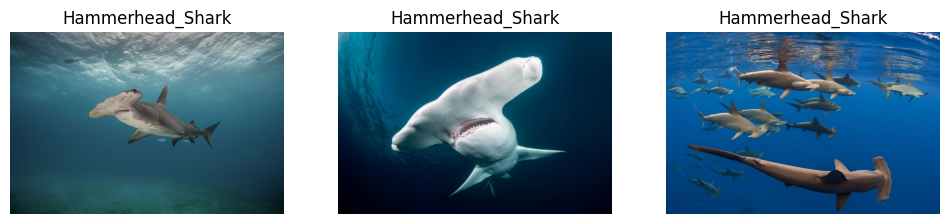


🦈 Mako_Shark — Showing 3 image(s):


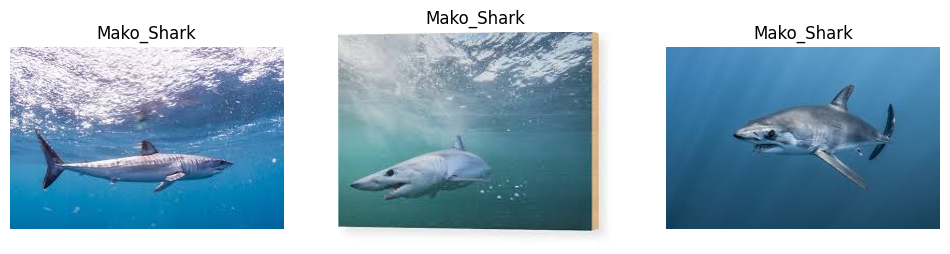


🦈 Tiger_Shark — Showing 3 image(s):


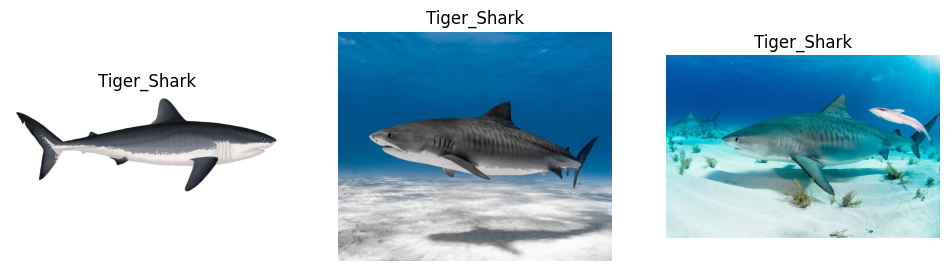


🦈 Whale_Shark — Showing 3 image(s):


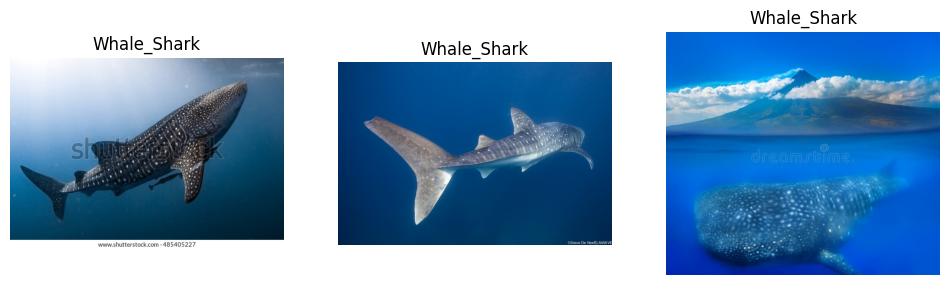


🦈 Whitetip_Shark — Showing 3 image(s):


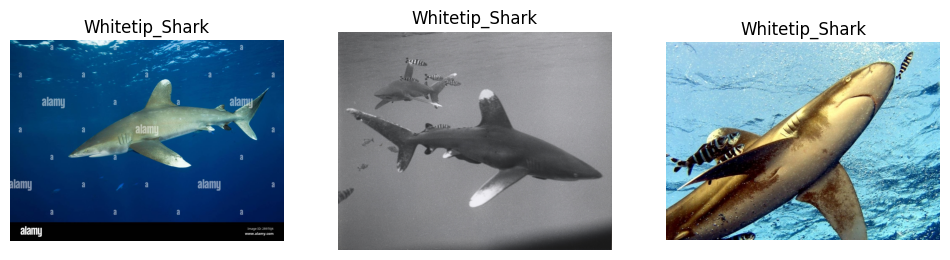

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# مجلد الصور
base_dir = "/content/Shark_project/shark_fins_raw"

# الحصول على أسماء الأصناف
shark_classes = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])

# لكل صنف، نعرض 3 صور
for shark_class in shark_classes:
    class_path = os.path.join(base_dir, shark_class)
    images = [img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg", ".png"))]

    # لو مفيش صور، نعدي
    if len(images) == 0:
        continue

    # نختار 3 صور عشوائيًا (أو أقل لو العدد مش كافي)
    sample_images = random.sample(images, min(3, len(images)))

    print(f"\n🦈 {shark_class} — Showing {len(sample_images)} image(s):")

    # عرض الصور
    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(1, len(sample_images), i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{shark_class}")
    plt.show()

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

# المجلد الأساسي للصور قبل التقسيم
source_dir = "/content/Shark_project/shark_fins_raw"
# المجلد الذي سننشئ فيه المجلدات المقسمة
dest_dir = "/content/Shark_project_split"

# النسب
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# إنشاء مجلدات train, val, test
splits = ['train', 'val', 'test']
for split in splits:
    split_path = os.path.join(dest_dir, split)
    os.makedirs(split_path, exist_ok=True)

# لكل صنف ننسخ الصور حسب النسبة
for class_name in tqdm(os.listdir(source_dir)):
    class_path = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    n_total = len(images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)

    split_counts = {
        'train': images[:n_train],
        'val': images[n_train:n_train+n_val],
        'test': images[n_train+n_val:]
    }

    for split in splits:
        split_class_dir = os.path.join(dest_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for img_file in split_counts[split]:
            src_path = os.path.join(class_path, img_file)
            dst_path = os.path.join(split_class_dir, img_file)
            shutil.copy2(src_path, dst_path)

100%|██████████| 8/8 [00:00<00:00, 14.23it/s]


In [ ]:
!unzip "/content/sharks_raw.zip "-d "/content/Shark_project"

In [ ]:

# هذا هو الـ File ID من الرابط:
# https://drive.google.com/file/d/14uDazr8KcJqzV4A52EuQ-gOMoorWEOek/view
# ID هو: 14uDazr8KcJqzV4A52EuQ-gOMoorWEOek

!gdown 14uDazr8KcJqzV4A52EuQ-gOMoorWEOek

In [ ]:
!unzip "/content/sharks_raw.zip" -d "/content/Shark_project"

In [ ]:
!pip install -q transformers datasets torchvision evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import os

# المسار إلى البيانات
data_dir = "/content/Shark_project_split"

# التحويلات المبدئية (تصغير الصور وتحويلها إلى Tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# تحميل البيانات
dataset = ImageFolder(data_dir, transform=transform)

# تقسيم إلى تدريب واختبار
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [ ]:
from transformers import ViTForImageClassification, ViTFeatureExtractor, TrainingArguments, Trainer, ViTImageProcessor
import torch
import numpy as np
from datasets import Dataset as HFDataset

# استخلاص الخصائص
# feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224") # Deprecated
feature_extractor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

# تعريف نموذج التصنيف
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=len(dataset.classes),
    id2label={str(i): c for i, c in enumerate(dataset.classes)},
    label2id={c: str(i) for i, c in enumerate(dataset.classes)},
    ignore_mismatched_sizes=True # Add this argument to ignore the size mismatch in the classifier layer
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./vit-shark-classifier",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch", # Changed from evaluation_strategy
    save_strategy="epoch",
    num_train_epochs=5,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

from evaluate import load
accuracy = load("accuracy")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return accuracy.compute(predictions=preds, references=p.label_ids)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_train,
    eval_dataset=hf_val,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics
)

trainer.train()

NameError: name 'hf_train' is not defined